# Esame Laboratorio di Programmazione II - 22/07/2025


Scrivete chiaramente sul notebook il vostro nome e matricola e rinominate il file che consegnate come `matricola.ipynb` (la matricola è SMnumeri o ECnumeri).

Per ogni funzione e metodo che richiede un campionamento rispetto ad una distribuzione settate il seed a 0: ``np.random.seed(0)``.

Stampate il risultato delle domande e consegnate il compito eseguito, quindi per cui ogni cella ha il corrispondente output.
Quindi ad esempio

e.g., 
NON scrivete: 
```python 
    lista=np.array([1,2,3])
```
ma 
```python
    lista=np.array([1,2,3]) 
    print('lista =', lista)   
```
Attenzione!Se scrivete:
```python
    lista=np.array([1,2,3])
    lista
```
``lista`` sarà l'unico ouput che si vede di quella cella

NB: Potete usare anche più di una cella python per domanda e se l'output è una matrice molto grande non dovete stamparla.

Sarà valutata anche la presentazione, ad esempio un plot senza etichette sugli assi o illeggibili sarà valutato meno bene di uno con etichette chiare.

Cercate di commmentare il compito di modo che si capisca cosa avete fatto.

Controllate attentamente di avere consegnato il file giusto.

## Esercizio 1

Crea un vettore NumPy con le seguenti spese annuali per l’auto (in euro) sostenute da 7 persone:
3200, 2750, 4100, 3600, 2950, 5100, 4400

1. Calcola la spesa totale complessiva sostenuta dal gruppo.

2. Le persone con spese minori di 3000 € ottengono una detrazione fiscale del 15%. Applica la modifica al vettore.

3. Quanto ha risparmiato il gruppo dopo la detrazione fiscale?


In [9]:
import numpy as np

speseAuto = np.array([3200, 2750, 4100, 3600, 2950, 5100, 4400], dtype=float)

sumSpesa = speseAuto.sum()

print("Spese totali auto", sumSpesa)


#2
speseAuto[speseAuto < 3000] *= 0.85
spesaDetrazione = speseAuto.sum()
print("Spese auto con detrazione", spesaDetrazione)


#3 
risparmio = sumSpesa - spesaDetrazione


print("Risparmio totale", risparmio)


Spese totali auto 26100.0
Spese auto con detrazione 25245.0
Risparmio totale 855.0


## Esercizio 2
1. Scrivi una funzione che simula il lancio di un dado per N volte e restituisce un array con il numero di volte che è uscita ciascuna faccia (da 1 a 6).
2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.
3. Fai il plot dell’andamento della frequenza media delle facce 1, 3 e 6 in funzione della dimensione del campione.



[  10   60  110  161  211  262  312  362  413  463  514  564  614  665
  715  766  816  866  917  967 1018 1068 1118 1169 1219 1270 1320 1370
 1421 1471 1522 1572 1622 1673 1723 1774 1824 1874 1925 1975 2026 2076
 2126 2177 2227 2278 2328 2378 2429 2479 2530 2580 2631 2681 2731 2782
 2832 2883 2933 2983 3034 3084 3135 3185 3235 3286 3336 3387 3437 3487
 3538 3588 3639 3689 3739 3790 3840 3891 3941 3991 4042 4092 4143 4193
 4243 4294 4344 4395 4445 4495 4546 4596 4647 4697 4747 4798 4848 4899
 4949 5000]
[4 5 4 4 3 4 3 6 6 3]
[5 4 4 6 1 1 1 5 5 6 6 5 3 5 1 4 1 6 4 3 2 5 3 4 1 4 4 4 6 5 3 3 5 1 5 5 2
 1 2 3 4 3 6 1 2 1 4 2 3 2 1 1 4 1 2 3 5 1 6 1]
[6 3 6 4 5 1 2 1 2 1 2 3 1 5 4 2 4 1 4 6 2 5 1 5 2 2 4 1 5 1 5 2 5 6 2 4 4
 4 2 6 3 6 5 2 5 3 6 4 6 5 5 4 6 4 3 4 1 2 4 2 4 3 1 2 4 4 4 4 4 3 6 3 3 6
 5 5 1 6 5 6 1 6 1 4 1 6 5 4 3 1 5 3 5 6 6 6 1 3 5 2 4 1 2 1 5 2 3 6 5 1]
[1 4 4 2 6 4 4 4 5 2 3 2 2 6 5 3 2 2 1 3 2 5 3 2 1 1 5 3 4 6 6 2 4 2 1 5 2
 3 4 5 4 6 2 5 2 6 5 2 6 5 2 2 4 1 2 3 3 3 2 4 

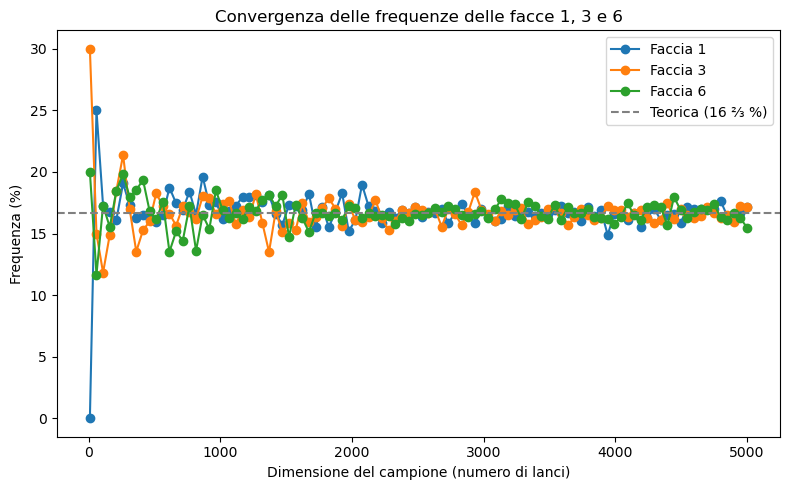

In [45]:
import matplotlib.pylab as plt
import numpy as np


np.random.seed(0)

def lanci(N):
    lancio = np.random.choice((1,2,3,4,5,6), N, p = np.ones(6)/6)
    print(lancio)
    counts = np.zeros(6, dtype=int)
    
    for f in lancio:
        counts[f - 1] += 1             
    return counts
        


# 2. Calcolare la frequenza % con la dimensione del campione (numero di lanci) 100 volte da 10 a 5000.  Ottieni così 100 array di frequenze.


n_samples = 100
sample_sizes = np.linspace(10, 5000, n_samples, dtype=int)   # 100 valori da 10 a 5000
print(sample_sizes)
freqs_percent = np.zeros((n_samples, 6)) 
for i, N in enumerate(sample_sizes):
    counts = lanci(N)
    freqs_percent[i] = counts / N * 100
    
# ------------------------------------------------------------
# 3. Plot andamento della frequenza media delle facce 1, 3 e 6
# ------------------------------------------------------------
plt.figure(figsize=(8, 5))
for face in (1, 3, 6):
    plt.plot(sample_sizes,
             freqs_percent[:, face - 1],
             marker='o',
             label=f"Faccia {face}")

plt.axhline(y=100/6, color='gray', linestyle='--', label='Teorica (16 ⅔ %)')
plt.xlabel("Dimensione del campione (numero di lanci)")
plt.ylabel("Frequenza (%)")
plt.title("Convergenza delle frequenze delle facce 1, 3 e 6")
plt.legend()
plt.tight_layout()
plt.show()                    
    

## Esercizio 3

1. Genera una matrice NumPy di dimensioni 7 x 7, con valori estratti da una distribuzione normale con media = 0, ed std = 5.

2. Per ogni riga, identifica il valore più lontano da zero (cioè con valore assoluto massimo). Crea un array con questi 7 valori (uno per riga).

3. Calcola quante di queste righe hanno il valore più lontano da zero positivo?

In [59]:
import numpy as np

np.random.seed(0)

mat = np.random.normal(0,5, size=(7,7))
print("Matrice Generata", mat)


valoriLontanti = np.zeros(7)

for i in range(7):
    maxDistance = np.abs (mat[i][0] - 0 )
    j = 1
    for j in range(7):
        valoreAttuale = np.abs(0 - mat[i][j])
        if(valoreAttuale > maxDistance):
            maxDistance = valoreAttuale
    valoriLontanti[i] = maxDistance
    
print("Valori piu lontani da 0", valoriLontanti)


countOver0 =  0

for valori in range(valoriLontanti.size):
    if(valori > 0):
        countOver0 += 1
        
print("Numero di valori lontani da 0 positivi", countOver0)


Matrice Generata [[  8.82026173   2.00078604   4.89368992  11.204466     9.33778995
   -4.8863894    4.75044209]
 [ -0.75678604  -0.51609426   2.05299251   0.72021786   7.27136753
    3.80518863   0.60837508]
 [  2.21931616   1.66837164   7.47039537  -1.02579132   1.56533851
   -4.2704787  -12.76494908]
 [  3.26809298   4.32218099  -3.7108251   11.34877312  -7.27182837
    0.22879259  -0.93591925]
 [  7.66389607   7.34679385   0.77473713   1.8908126   -4.43892874
   -9.90398234  -1.73956075]
 [  0.78174485   6.1514534    6.01189924  -1.93663409  -1.51151375
   -5.24276483  -7.10008969]
 [ -8.53135095   9.75387698  -2.54826091  -2.19037151  -6.2639768
    3.88745178  -8.06948924]]
Valori piu lontani da 0 [11.204466    7.27136753 12.76494908 11.34877312  9.90398234  7.10008969
  9.75387698]
Numero di valori lontani da 0 positivi 6


## Esercizio 4 

Utilizza il dataset cereal.csv.

Contiene dati nutrizionali (proteine, fibre, calorie, zuccheri, ecc.) per circa 70 cereali.


1.  Aggiungi una colonna chiamata `nutri_score`, definita come:
$$
\texttt{nutri\_score} = \frac{\texttt{protein} + \texttt{fiber}}{\texttt{calories}}
$$

Indica quanti nutrienti positivi ci sono per ogni caloria: più è alto, più il cereale è "nutriente a parità di energia.

2. Trova i **5 cereali con il `nutri_score` più alto** e stampali con `name` e `nutri_score`.

3. Filtra i cereali che soddisfano entrambi i criteri:

   - meno di 120 calorie  
   - più di 2 grammi di fibra 


4. **Crea un grafico a barre** dei **10 cereali con il `nutri_score` più alto**, usando `name` sull’asse x.

5. Crea uno **scatter plot** (grafico a punti) che visualizzi:

   - `calories` sull’asse x  
   - `nutri_score` sull’asse y
   - `protein` nel colore dei punti


        name mfr type  calories  protein  fat  sodium  fiber  carbo  sugars  \
0  100% Bran   N    C        70        4    1     130   10.0    5.0       6   

   potass  vitamins  shelf  weight  cups     rating  
0     280        25      3     1.0  0.33  68.402973  
Nutri score creato 0    0.114286
1    0.050000
2    0.114286
3    0.160000
4    0.036364
Name: nutri_score, dtype: float64
Top 5 nutri score:
Top 5 cereali per nutri score                          name  nutri_score
3   All-Bran with Extra Fiber     0.160000
0                   100% Bran     0.114286
2                    All-Bran     0.114286
11                   Cheerios     0.109091
67                  Special K     0.109091
Cereali con meno di 120 calorie e più di 2 grammi di fibra:
                         name  calories  fiber  nutri_score
3   All-Bran with Extra Fiber        50   14.0     0.160000
0                   100% Bran        70   10.0     0.114286
2                    All-Bran        70    9.0     0.114286
57 

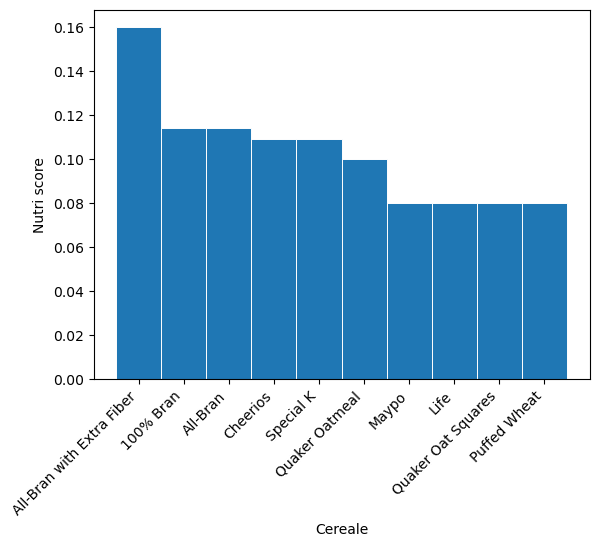

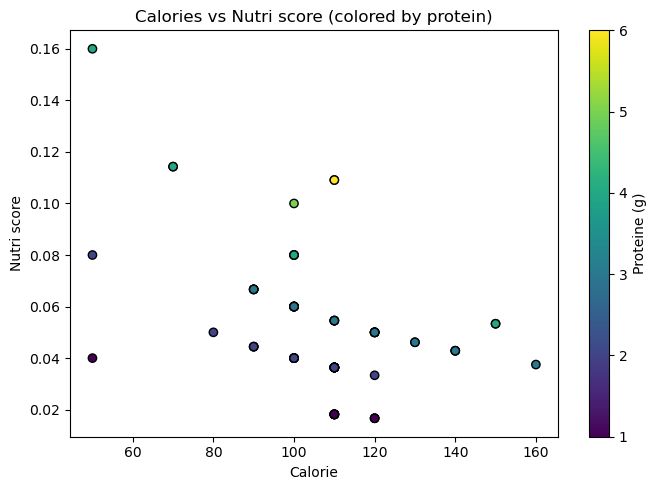

In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("cereal.csv", sep=";")

print(df.head(1))

df['nutri_score'] = (df['protein'] + df['protein']) / df['calories']
print("Nutri score creato" ,df['nutri_score'].head(5))


df.sort_values("nutri_score", ascending=False, inplace=True)


# nutri score top 5
print("Top 5 nutri score:")
print("Top 5 cereali per nutri score",df[["name", "nutri_score"]].head(5))

#filtro
dfFiltered = df[(df['calories'] < 120) & (df['fiber'] > 2)]
print("Cereali con meno di 120 calorie e più di 2 grammi di fibra:")
print(dfFiltered[["name", "calories", "fiber", "nutri_score"]])
#grafico a barre

dfTop10 = df.head(10)

fig, ax = plt.subplots()
ax.bar(dfTop10['name'], dfTop10['nutri_score'], width=1, edgecolor="white", linewidth=0.7)
plt.xlabel("Cereale")
plt.ylabel("Nutri score")
plt.xticks(rotation=45, ha='right')
plt.show()

    


#scater plot

# plot
plt.figure(figsize=(7, 5))
sc = plt.scatter(df['calories'], df['nutri_score'],
                 c=df['protein'], cmap='viridis', edgecolor='k')
plt.colorbar(sc, label='Proteine (g)')
plt.xlabel("Calorie")
plt.ylabel("Nutri score")
plt.title("Calories vs Nutri score (colored by protein)")
plt.tight_layout()


## Esercizio 5 

Utilizza il dataset `imdb_top_1000.csv`, che contiene informazioni su 1000 film recensiti su IMDB.

1. Quanti **valori mancanti** ci sono per colonna? Elimina le righe con i valori mancanti.

2. Elimina la colonna `Overview`. Aggiungi una colonna (`main_genre`) con solo il primo genere della colonna `genre`. Quali sono i 5 generi più frequenti?

3. Che attore/attrice è stato/a più volte la `Star1` e quello/a che ha fatto più film.

4. Calcola l'IMDB_rating medio e il Gross medio di ogni genere. Fai uno scatter plot dell'IMDB_rating medio e il Gross medio di ogni genere. Riesci a mettere anche l'ettichetta del genere?

5. Visualizza la distribuzione del IMDB_rating  e la distribuzione del `Gross` dei primi 5 main_genre. (Hint fai due violin plot).




## Esercizio 6

Considera i seguenti dati, che :

`x = np.linspace(0, 10, 100)`  
`y = -3.5 * x + 2 + np.random.normal(0, 10, 100)`

Cerca di riprodurre la retta fittando i parametri della funzione y = ax + b.

1. Stima i parametri della retta.
2. Calcola l’intervallo di confidenza al 95% dei parametri a e b.
N.B il secondo output del metodo curve_fit è proprio la matrice di covarianza: `params, cov = curve_fit(retta, x, y)`. 
L'**errore standard** di ciascun parametro si calcola come:

$$
\text{errore\_standard}_i = \sqrt{\text{cov}(i, i)}
$$

dove $\text{cov}(i, i)$ è l'elemento diagonale $i$-esimo della **matrice di covarianza**.

L’**intervallo di confidenza al 95%** si approssima con:

$$
\text{parametro}_i \pm 1.96 \times \text{errore\_standard}_i
$$
3. Plotta i punti originali e la retta ottenuta con anche l'intervallo di confidenza

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 100)
y = -3.5 * x + 2 + np.random.normal(0, 10, 100)

def linear_func(x, a, b):
    return a * x + b

